In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../dataset/task_exec.xlsx')

In [3]:
print(df.head(5))

                 Time  Lounge  Gate  Duration  People
0 2024-01-31 23:43:00      60    71        38  吴鸣杰施圣卿
1 2024-01-31 23:49:00      88    87        32     储卫刚
2 2024-02-01 00:07:00      88    95        34     费明荣
3 2024-02-01 00:18:00      88    79        39  陈嘉琦杨振宇
4 2024-02-01 00:54:00      88    97        38     李照富


In [4]:
# 计算缺失
missing = df['People'].isnull().sum()
print('缺失率', missing/len(df))

缺失率 0.0


In [5]:
import sys 
sys.path.append('../')
sys.path.append('../airports_sim/')
from airports_sim.airports import airports
airport = airports()
flights_path = '../dataset/flights_obs.xlsx'
aviation_path =  '../dataset/new_aviationCompany.xlsx'
crew_zizhi_path = '../dataset/人员资质证明.xlsx'
crew_group_path = '../dataset/人员组别.xlsx'
gate_lounge_path = '../dataset/Gate_lounge.xlsx'
type_minNum_path = '../dataset/机型最小人员数.xlsx'
airport.login(aviation_path,flights_path,crew_zizhi_path,crew_group_path,gate_lounge_path,type_minNum_path)

Flights login success,len is  19089


In [6]:
print(airport.flightSet.df_flights.head(5))

  航班类别       机号    机型  机位  plan_date plan_time 航空公司     type  \
0  PAX    9MXXU  A333  71 2024-02-01  00:20:00   D7  inbound   
1  PAX  RPC4124  A21N  87 2024-02-01  00:05:00   5J  inbound   
2  PAX    B323D  A20N  95 2024-02-01  00:30:00   HO  inbound   
3  PAX   JA212P  A20N  79 2024-02-01  00:20:00   MM  inbound   
4  PAX    B6861  A320  97 2024-02-01  00:30:00   HO  inbound   

      actual_datetime  
0 2024-01-31 23:43:00  
1 2024-01-31 23:49:00  
2 2024-02-01 00:07:00  
3 2024-02-01 00:18:00  
4 2024-02-01 00:54:00  


In [7]:
print(airport.flightSet.df_flights.shape[0])

19089


Text(0.5, 1.0, 'Flights count in Feburary')

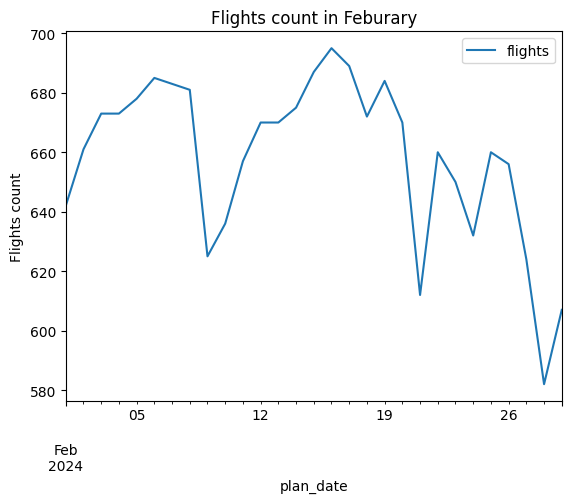

In [8]:

airport.flightSet.df_flights.groupby('plan_date').count().plot(y='plan_time')
plt.legend(['flights'])
plt.ylabel('Flights count')
plt.title('Flights count in Feburary')